## Credit Card Fraud Transaction detection using machine learning

### Introduction
To build machine learning models to detect fraudulent card transactions 

### Data Description

We make use of the credit card data(https://www.kaggle.com/mlg-ulb/creditcardfraud/data) that consists of two-days credit card transactions made in September 2013 by European cardholders. The dataset is highly unbalanced with a low percentage of fraudulent transactions within several records of normal transactions. The positive class (frauds) account for 0.172% (492 frauds out of 284,807 transactions) of all transactions.

Features V1, V2, ... V28 are the principal components that have been extracted using Principal component analysis, whereas the features 'Time' and 'Amount' are in its original form. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.  Feature 'Class' is the target variable with value 1 in case of fraud and 0 otherwise. 

### Import Libraries

In [1]:
# Import basic libraries 
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import ADASYN 
from collections import Counter
import seaborn as sn

# plot functions
import plot_functions as pf

# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics

# settings
%matplotlib inline
sn.set_style("dark")
sn.set_palette("colorblind")



# Suppress warnings

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Load Data  
The dataset is freely available at: https://www.kaggle.com/mlg-ulb/creditcardfraud/data

In [2]:
df = pd.read_csv(r"E:\005Balgrist\012DataScience_Projects\14_Credit_card_fraud_detection\PK_Try\creditcard.csv")

### Explore the Data  

In [3]:
# View top 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset contains 284807 rows and 31 columns.
The two classes are really imbalanced!


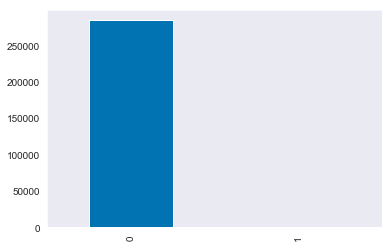

In [4]:
# determine the number of records in the dataset
count = pd.value_counts(df['Class'], sort = True).sort_index()
count.plot(kind = 'bar')
count

print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))
print('The two classes are really imbalanced!')

In [5]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Explore label class

In [6]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


### Separate feature data (predictors) from labels

In [7]:
# feature data (predictors)

X = df.drop('Class',axis=1) # or use: X = df.iloc[:, :-1]
# label class
y = df['Class']

### Explore data

#### Lets look at how the classes behave with respect to the feature "Amount"

C:\Users\pruthvi\Anaconda3\envs\tfpy36gpu\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


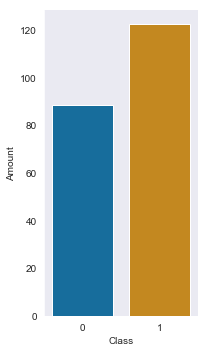

In [8]:
sn.factorplot(x="Class", y="Amount", data=df, kind="bar", ci=None, aspect=.6)


#### Lets look at how the classes behave with respect to the feature "Time"

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


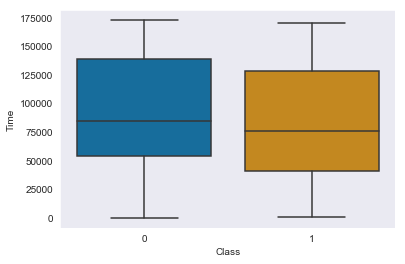

In [9]:
sn.boxplot(x="Class", y="Time",data=df)
df.groupby("Class").Time.describe()

By looking at the above plot, we cannot use only "time" as the feature to classify fraud transactions.

So, we have to have a better feature. Lets use a new feature which is the "time difference between transaction and the precede transaction".In order to that, we will combine train and test first, do the feature engineering, then split the dataset again.

#### Lets look at how the classes behave with respect to the feature "Time difference"

In [11]:
data1 = df
data1['Time_Difference'] = data1['Time']-data1['Time'].shift()
#remove the nan row caused by lag
data1.dropna(axis=0,inplace=True)

data1.groupby('Class').Time_Difference.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284314.0,0.605869,1.051233,0.0,0.0,0.0,1.0,32.0
1,492.0,1.087398,1.870144,0.0,0.0,0.0,1.0,16.0


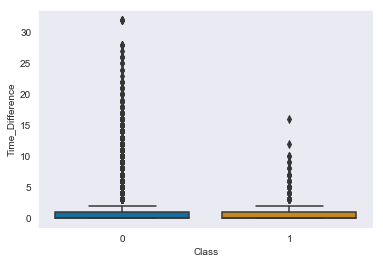

In [12]:
sn.boxplot(x="Class", y="Time_Difference",data=data1)

Most of the time difference are similiar, however, some large difference might indicates fraud, as fraud often happens at time that has few transactions.

### Lets start training classifiers --> First, standardize the data, then resample to compensate imbalance and  then finaly explore different classifiers.

### Standardize data
Scale the data to have zero mean and unit variance.

In [14]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Partition data into train and test sets

In [20]:
# Partition data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)


### Data Sampling  
To compensate for the imbalance in dataset, we will use ADASYN oversampling method by importing imbalanced-learn package to resample the dataset.  
ADASYN (ADAptive SYNthetic) is an [oversampling technique](https://www.datasciencecentral.com/profiles/blogs/handling-imbalanced-data-sets-in-supervised-learning-using-family) that adaptively generates minority data samples according to their distributions using K nearest neighbor. 

In [21]:
# apply the ADASYN over-sampling
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = ada.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 190477, 1: 343})
Resampled dataset shape Counter({1: 190496, 0: 190477})


### Train Models  
Three machine learning algorithms: Logistic Regression, Naive Baye, and RandomForest classifiers were trained using the processed feature data.

In [22]:
X_train, y_train = X_res, y_res 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);


### Evaluate Models  

In [23]:
# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier),
('Naive Baiye Classifier', BNB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  99.4%

Model Accuracy:  100.0%

Confusion Matrix:
 [[190475      2]
 [     0 190496]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190477
           1       1.00      1.00      1.00    190496

   micro avg       1.00      1.00      1.00    380973
   macro avg       1.00      1.00      1.00    380973
weighted avg       1.00      1.00      1.00    380973


===== LogisticRegression =====

Cross Validation Mean Score:  96.2%

Model Accuracy:  96.2%

Confusion Matrix:
 [[187029   3448]
 [ 10953 179543]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    190477
           1       0.98      0.94      0.96    190496

   micro avg       0.96      0.96      0.96    380973
   macro avg       0.96  

### Test Models


========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  100.0%

Confusion Matrix:
 [[93814    24]
 [   21   128]]



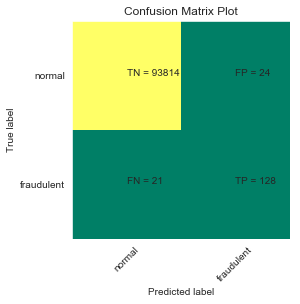


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.84      0.86      0.85       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.92      0.93      0.93     93987
weighted avg       1.00      1.00      1.00     93987


=== LogisticRegression ===
Model Accuracy:  98.2%

Confusion Matrix:
 [[92134  1704]
 [   14   135]]



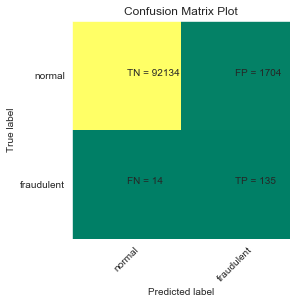


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     93838
           1       0.07      0.91      0.14       149

   micro avg       0.98      0.98      0.98     93987
   macro avg       0.54      0.94      0.56     93987
weighted avg       1.00      0.98      0.99     93987


=== Naive Baiye Classifier ===
Model Accuracy:  99.6%

Confusion Matrix:
 [[93481   357]
 [   22   127]]



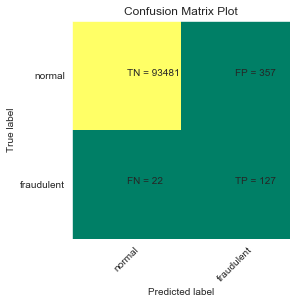


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.26      0.85      0.40       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.63      0.92      0.70     93987
weighted avg       1.00      1.00      1.00     93987


============================= ROC Curve ===============================



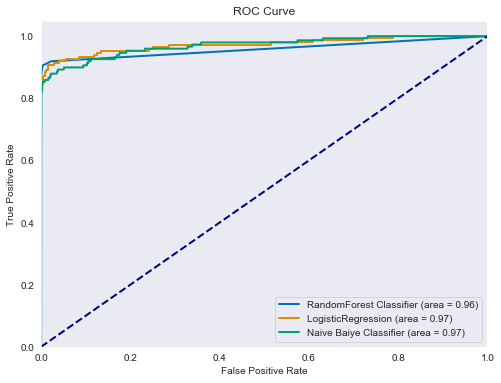

In [24]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    pf.plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n")      
pf.plot_roc_auc(arg1=models, arg2=X_test, arg3=y_test)

### Conculsion 
It is common to use classification accuracy as a first measure to judge classifier performance, but when the classes are as imbalanced as in the case of credit card data, accuracy measures are misleading because they may just reflect the underlying class distribution even if the true accuracy is higher. It is better to consider sensitivity (recall) and specificity that give more insight into the classifier performance.

For instance,
if the true fraud credit card transaction is classified as false, then is is a huge loss for banks and customers. However, if the true transaction was classified as fraud, eventhough it is not favorable, atleast banks won't lose money. Therefore, more weightage should be given to detect fraud transaction as fraud i.e True positives with higher accuracy i.e. higher recall/sensitivity is favorable.


In our test on different classifiers with Random forest, logistic regression and Naive Bayes Classifier, we found logisistic regression to be performing better than other two with higher recall= 91% on test set.
